Slope:  9.775803390787468
Intercept:  2.48367340537321
R² Score: 0.9529481969048356


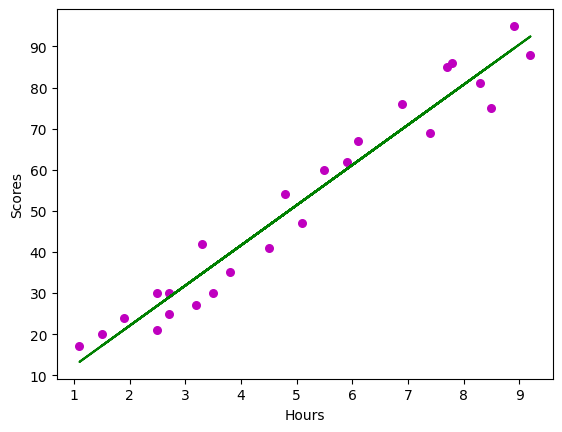

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_coeff(x,y):
    n = np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x*y)
    xs_mean = np.mean(x*x)
    x_mean_s = x_mean*x_mean

    b1 = (xy_mean - x_mean*y_mean)/(xs_mean - x_mean_s)
    b0 = y_mean - b1*x_mean
    return (b0, b1)

def plot_regression(x,y,b):
    plt.scatter(x,y,color='m', marker='o', s=30)
    y_pred = b[0] + b[1]*x
    plt.plot(x,y_pred, color='g')

    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.show()


def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


#dataset placeholder
data = pd.read_csv('student_scores.csv')

#independent variable
x = data['Hours'].values

#dependent variable
y = data['Scores'].values


b = calculate_coeff(x,y)
print("Slope: ", b[1])
print("Intercept: ", b[0])

y_pred = b[0] + b[1] * x
print("R² Score:", r2_score(y, y_pred))


plot_regression(x,y,b)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def load_dataset(csv_path, target_column):
    """
    Loads dataset and separates features (X) and target (y).
    """
    data = pd.read_csv(csv_path)
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
    feature_names = list(data.drop(columns=[target_column]).columns)
    return X, y, feature_names


def calculate_coefficients(X, y):
    """
    Calculates coefficients using the Normal Equation: (XᵀX)^-1 Xᵀy
    """
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta


def predict(X, theta):
    """
    Predicts output values using learned coefficients.
    """
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b @ theta


def r2_score(y_true, y_pred):
    """
    Calculates R² score to evaluate model performance.
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


def plot_predictions(X, y_true, y_pred, feature_names):
    """
    2D plot (only for first feature) comparing actual and predicted values.
    """
    plt.scatter(X[:, 0], y_true, color='blue', label='Actual')
    plt.scatter(X[:, 0], y_pred, color='red', label='Predicted')
    plt.xlabel(feature_names[0])
    plt.ylabel('Target')
    plt.title(f'Actual vs Predicted ({feature_names[0]})')
    plt.legend()
    plt.show()


def run_multiple_linear_regression(csv_path, target_column):
    """
    Executes the entire MLR pipeline.
    """
    X, y, feature_names = load_dataset(csv_path, target_column)
    theta = calculate_coefficients(X, y)
    y_pred = predict(X, theta)
    r2 = r2_score(y, y_pred)

    print("Intercept:", theta[0])
    for i, name in enumerate(feature_names):
        print(f"Coefficient for {name}: {theta[i + 1]}")
    print("R² Score:", r2)

    plot_predictions(X, y, y_pred, feature_names)


# Example usage
# run_multiple_linear_regression('datasets/student_scores_multivariable.csv', 'Scores')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the CSV file (ensure the file is uploaded in your Colab environment)
df = pd.read_csv("hiring.csv")
# Rename columns for convenience
df.columns = ['experience', 'test_score', 'interview_score', 'salary']

print("Original Data:")
print(df)
# Function to convert experience values to numeric
def convert_experience(x):
    try:
        return float(x)
    except:
        x_lower = str(x).strip().lower()
        return num_map.get(x_lower, np.nan)

# Convert the 'experience' column using the mapping
df['experience'] = df['experience'].apply(convert_experience)

# Convert 'test_score', 'interview_score', and 'salary' to numeric (coerce errors to NaN)
df['test_score'] = pd.to_numeric(df['test_score'], errors='coerce')
df['interview_score'] = pd.to_numeric(df['interview_score'], errors='coerce')
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

print("\nData After Conversion:")
print(df)
# Fill missing values in numeric columns using the column mean
df['experience'].fillna(df['experience'].mean(), inplace=True)
df['test_score'].fillna(df['test_score'].mean(), inplace=True)
df['interview_score'].fillna(df['interview_score'].mean(), inplace=True)

print("\nData After Filling Missing Values:")
print(df)
# Prepare the feature matrix X and target vector y
X = df[['experience', 'test_score', 'interview_score']]
y = df['salary']
# Build and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)
# Predict salaries for the given candidate profiles
# Candidate 1: 2 years of experience, 9 test score, 6 interview score
candidate1 = np.array([[2, 9, 6]])
predicted_salary1 = model.predict(candidate1)

# Candidate 2: 12 years of experience, 10 test score, 10 interview score
candidate2 = np.array([[12, 10, 10]])
predicted_salary2 = model.predict(candidate2)

print("\nPredicted Salary for Candidate (2 yrs, 9 test, 6 interview): $", round(predicted_salary1[0], 2))
print("Predicted Salary for Candidate (12 yrs, 10 test, 10 interview): $", round(predicted_salary2[0], 2))
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.scatter(df['experience'], y, color='blue', label='Actual Salary') #Plot actual salary against years of experience

# Plot the regression line (this is an approximation since it's a multi-variable regression)
# You can visualize a single feature against the predicted salary
plt.plot(df['experience'], model.predict(X), color='red', label='Regression Line')

# Highlight predictions
plt.scatter(candidate1[0, 0], predicted_salary1, color='green', label='Candidate 1 Prediction')
plt.scatter(candidate2[0, 0], predicted_salary2, color='purple', label='Candidate 2 Prediction')

# Add labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction based on Experience, Test Score, Interview Score")

# Add a legend
plt.legend()
plt.grid(True)
plt.show()


----- Simple Linear Regression -----
Intercept: 152.00335421448167
Coefficient: 998.5776891375598
MSE: 4061.83
R² Score: 0.23


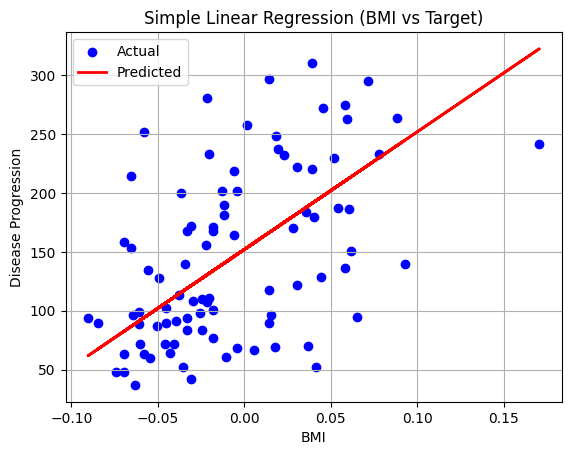


----- Multi-Linear Regression -----
Intercept: 151.34560453985995
Coefficients:
age: 37.9040
sex: -241.9644
bmi: 542.4288
bp: 347.7038
s1: -931.4888
s2: 518.0623
s3: 163.4200
s4: 275.3179
s5: 736.1989
s6: 48.6707
MSE: 2900.19
R² Score: 0.45


In [1]:
# linear_regression_sklearn.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# ----- Simple Linear Regression (using only one feature) -----
# Select one feature for simple linear regression
X_simple = X[['bmi']]  # Body Mass Index is often a strong predictor

# Split dataset
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Model training
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Prediction
y_pred_s = model_simple.predict(X_test_s)

# Evaluation
print("----- Simple Linear Regression -----")
print(f"Intercept: {model_simple.intercept_}")
print(f"Coefficient: {model_simple.coef_[0]}")
print(f"MSE: {mean_squared_error(y_test_s, y_pred_s):.2f}")
print(f"R² Score: {r2_score(y_test_s, y_pred_s):.2f}")

# Plotting
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression (BMI vs Target)')
plt.legend()
plt.grid(True)
plt.show()

# ----- Multi-Linear Regression (using all features) -----
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

y_pred_m = model_multi.predict(X_test_m)

print("\n----- Multi-Linear Regression -----")
print("Intercept:", model_multi.intercept_)
print("Coefficients:")
for feat, coef in zip(X.columns, model_multi.coef_):
    print(f"{feat}: {coef:.4f}")

print(f"MSE: {mean_squared_error(y_test_m, y_pred_m):.2f}")
print(f"R² Score: {r2_score(y_test_m, y_pred_m):.2f}")


----- Manual Linear Regression (Simple) -----
Theta (weights): [152.00335421 998.57768914]
Mean Squared Error: 4061.83
R² Score: 0.23


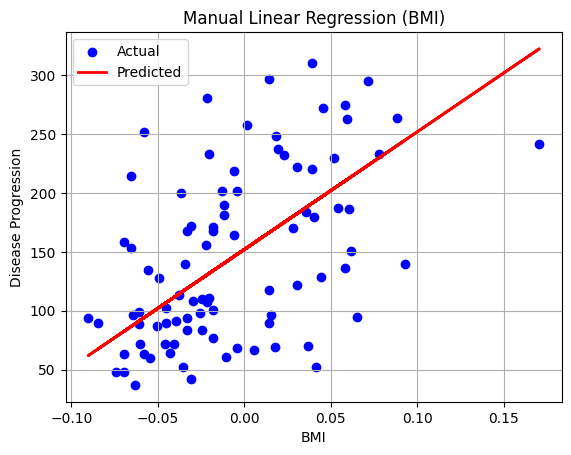

In [2]:
# linear_regression_manual.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 0: Save diabetes dataset as CSV if not already saved (run only once)
def save_dataset_to_csv():
    data = load_diabetes()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    df.to_csv("diabetes.csv", index=False)

# Uncomment below line to save the CSV once
save_dataset_to_csv()

# Step 1: Load dataset from CSV
df = pd.read_csv("diabetes.csv")

# Step 2: Select one feature and the target (for simple linear regression)
X = df[['bmi']].values  # shape: (n_samples, 1)
y = df['target'].values.reshape(-1, 1)  # shape: (n_samples, 1)

# Add bias term (column of ones) to X
X_b = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (n_samples, 2)

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Step 4: Compute theta using the Normal Equation
# theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Step 5: Make predictions
y_pred = X_test.dot(theta)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("----- Manual Linear Regression (Simple) -----")
print(f"Theta (weights): {theta.ravel()}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Plot predictions
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 1], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Manual Linear Regression (BMI)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# multi_linear_regression_manual.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset from CSV
df = pd.read_csv("diabetes.csv")

# Step 2: Prepare features (X) and target (y)
X = df.drop(columns=['target']).values  # shape: (n_samples, n_features)
y = df['target'].values.reshape(-1, 1)  # shape: (n_samples, 1)

# Add bias term (column of 1s)
X_b = np.hstack([np.ones((X.shape[0], 1)), X])  # shape: (n_samples, n_features + 1)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Step 4: Calculate coefficients using Normal Equation
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Step 5: Make predictions
y_pred = X_test.dot(theta)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("----- Manual Multi-Linear Regression -----")
print("Intercept:", theta[0][0])
print("Coefficients:")
for i, feat in enumerate(df.columns[:-1]):
    print(f"{feat}: {theta[i+1][0]:.4f}")

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


----- Manual Multi-Linear Regression -----
Intercept: 151.34560453986
Coefficients:
age: 37.9040
sex: -241.9644
bmi: 542.4288
bp: 347.7038
s1: -931.4888
s2: 518.0623
s3: 163.4200
s4: 275.3179
s5: 736.1989
s6: 48.6707

Mean Squared Error: 2900.19
R² Score: 0.45
